# Predict Minutes Played in 2021-22 For Each Player

#### Objective: predict how many minutes each player in the NBA will have based on what their personal history is (age and minutes played in past seasons)

#### Things to consider: Rookies will not have any history and will need to be entered manually or based on prior rookies who were drafted in their range

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# read in the data
url_path = 'https://raw.githubusercontent.com/CaseySteele24/NBA/main/Minute%20Projections'

season_2001 = pd.read_csv(url_path + '/Data/player_totals_scrape_2001.csv', encoding='utf-16')
season_2002 = pd.read_csv(url_path + '/Data/player_totals_scrape_2002.csv', encoding='utf-16')
season_2003 = pd.read_csv(url_path + '/Data/player_totals_scrape_2003.csv', encoding='utf-16')
season_2004 = pd.read_csv(url_path + '/Data/player_totals_scrape_2004.csv', encoding='utf-16')
season_2005 = pd.read_csv(url_path + '/Data/player_totals_scrape_2005.csv', encoding='utf-16')
season_2006 = pd.read_csv(url_path + '/Data/player_totals_scrape_2006.csv', encoding='utf-16')
season_2007 = pd.read_csv(url_path + '/Data/player_totals_scrape_2007.csv', encoding='utf-16')
season_2008 = pd.read_csv(url_path + '/Data/player_totals_scrape_2008.csv', encoding='utf-16')
season_2009 = pd.read_csv(url_path + '/Data/player_totals_scrape_2009.csv', encoding='utf-16')
season_2010 = pd.read_csv(url_path + '/Data/player_totals_scrape_2010.csv', encoding='utf-16')
season_2011 = pd.read_csv(url_path + '/Data/player_totals_scrape_2011.csv', encoding='utf-16')
season_2012 = pd.read_csv(url_path + '/Data/player_totals_scrape_2012.csv', encoding='utf-16')
season_2013 = pd.read_csv(url_path + '/Data/player_totals_scrape_2013.csv', encoding='utf-16')
season_2014 = pd.read_csv(url_path + '/Data/player_totals_scrape_2014.csv', encoding='utf-16')
season_2015 = pd.read_csv(url_path + '/Data/player_totals_scrape_2015.csv', encoding='utf-16')
season_2016 = pd.read_csv(url_path + '/Data/player_totals_scrape_2016.csv', encoding='utf-16')
season_2017 = pd.read_csv(url_path + '/Data/player_totals_scrape_2017.csv', encoding='utf-16')
season_2018 = pd.read_csv(url_path + '/Data/player_totals_scrape_2018.csv', encoding='utf-16')
season_2019 = pd.read_csv(url_path + '/Data/player_totals_scrape_2019.csv', encoding='utf-16')
season_2020 = pd.read_csv(url_path + '/Data/player_totals_scrape_2020.csv', encoding='utf-16')
season_2021 = pd.read_csv(url_path + '/Data/player_totals_scrape_2021.csv', encoding='utf-16')

In [3]:
# add the year/season to each of the files
season_2001['Season'] = 2001
season_2002['Season'] = 2002
season_2003['Season'] = 2003
season_2004['Season'] = 2004
season_2005['Season'] = 2005
season_2006['Season'] = 2006
season_2007['Season'] = 2007
season_2008['Season'] = 2008
season_2009['Season'] = 2009
season_2010['Season'] = 2010
season_2011['Season'] = 2011
season_2012['Season'] = 2012
season_2013['Season'] = 2013
season_2014['Season'] = 2014
season_2015['Season'] = 2015
season_2016['Season'] = 2016
season_2017['Season'] = 2017
season_2018['Season'] = 2018
season_2019['Season'] = 2019
season_2020['Season'] = 2020
season_2021['Season'] = 2021

In [4]:
# union all the files together
unioned_df = pd.concat([season_2001, season_2002, season_2003, season_2004, season_2005, season_2006, season_2007, season_2008, season_2009, 
season_2010, season_2011, season_2012, season_2013, season_2014, season_2015, season_2016, season_2017, season_2018, season_2019, season_2020, season_2021], ignore_index=True)

In [6]:
unioned_df.head(10)

,Name,Position,Age,Team,games_played,games_started,minutes_played,field_goals,field_goals_attempted,field_goal_percentage,...,offensive_rebs,defensive_rebs,total_rebs,assists,steals,blocks,turnovers,personal_fouls,points_scored,Season
0,Mahmoud Abdul-Rauf,PG,31,VAN,41,41,486,120,246,0.488,...,5,20,25,76,9,1,26,50,266,2001
1,Tariq Abdul-Wahad,SG,26,DEN,29,29,420,43,111,0.387,...,14,45,59,22,14,13,34,54,111,2001
2,Shareef Abdur-Rahim,SF,24,VAN,81,81,3241,604,1280,0.472,...,175,560,735,250,90,77,231,238,1663,2001
3,Cory Alexander,PG,27,ORL,26,26,227,18,56,0.321,...,0,25,25,36,16,0,25,29,52,2001
4,Courtney Alexander,PG,23,TOT,65,65,1382,239,573,0.417,...,42,101,143,62,45,5,75,139,618,2001
5,Courtney Alexander,PG,23,DAL,38,38,472,62,178,0.348,...,20,43,63,21,16,3,21,76,160,2001
6,Courtney Alexander,PG,23,WAS,27,27,910,177,395,0.448,...,22,58,80,41,29,2,54,63,458,2001
7,Ray Allen,SG,25,MIL,82,82,3129,628,1309,0.480,...,101,327,428,374,124,20,204,192,1806,2001
8,Rafer Alston,PG,24,MIL,37,37,288,30,84,0.357,...,4,27,31,68,13,0,20,27,77,2001
9,John Amaechi,C,30,ORL,82,82,1710,237,592,0.400,...,77,191,268,74,28,29,124,175,650,2001


In [7]:
unioned_df.tail(10)

,Name,Position,Age,Team,games_played,games_started,minutes_played,field_goals,field_goals_attempted,field_goal_percentage,...,offensive_rebs,defensive_rebs,total_rebs,assists,steals,blocks,turnovers,personal_fouls,points_scored,Season
12426,James Wiseman,C,19,GSW,39,39,836,191,368,0.519,...,55,171,226,26,11,36,60,121,448,2021
12427,Christian Wood,C,25,HOU,41,41,1326,329,640,0.514,...,76,319,395,71,34,48,80,88,860,2021
12428,Robert Woodard,SF,21,SAC,13,13,45,8,20,0.400,...,4,12,16,2,0,3,1,4,20,2021
12429,Delon Wright,SG-PG,28,TOT,63,63,1748,240,518,0.463,...,65,204,269,278,101,30,83,75,645,2021
12430,Delon Wright,SG,28,DET,36,36,1052,136,293,0.464,...,37,127,164,181,58,19,48,45,374,2021
12431,Delon Wright,PG,28,SAC,27,27,696,104,225,0.462,...,28,77,105,97,43,11,35,30,271,2021
12432,Thaddeus Young,PF,32,CHI,68,68,1652,370,662,0.559,...,168,255,423,291,74,40,137,152,823,2021
12433,Trae Young,PG,22,ATL,63,63,2125,487,1112,0.438,...,38,207,245,594,53,12,261,111,1594,2021
12434,Cody Zeller,C,28,CHO,48,48,1005,181,324,0.559,...,119,209,328,86,27,17,51,121,451,2021
12435,Ivica Zubac,C,23,LAC,72,72,1609,257,394,0.652,...,189,330,519,90,24,62,81,187,650,2021


In [8]:
# if a player has TOT shown for their team, only keep that record
# this is because the data also splits out that player by all teams they were on that season, TOT is combined
# TOT is always the first record, so we can sort, use drop_duplicates() 
unioned_df.drop_duplicates(subset=['Name', 'Season'], keep='first', inplace=True)

In [9]:
unioned_df.head(10)

,Name,Position,Age,Team,games_played,games_started,minutes_played,field_goals,field_goals_attempted,field_goal_percentage,...,offensive_rebs,defensive_rebs,total_rebs,assists,steals,blocks,turnovers,personal_fouls,points_scored,Season
0,Mahmoud Abdul-Rauf,PG,31,VAN,41,41,486,120,246,0.488,...,5,20,25,76,9,1,26,50,266,2001
1,Tariq Abdul-Wahad,SG,26,DEN,29,29,420,43,111,0.387,...,14,45,59,22,14,13,34,54,111,2001
2,Shareef Abdur-Rahim,SF,24,VAN,81,81,3241,604,1280,0.472,...,175,560,735,250,90,77,231,238,1663,2001
3,Cory Alexander,PG,27,ORL,26,26,227,18,56,0.321,...,0,25,25,36,16,0,25,29,52,2001
4,Courtney Alexander,PG,23,TOT,65,65,1382,239,573,0.417,...,42,101,143,62,45,5,75,139,618,2001
7,Ray Allen,SG,25,MIL,82,82,3129,628,1309,0.480,...,101,327,428,374,124,20,204,192,1806,2001
8,Rafer Alston,PG,24,MIL,37,37,288,30,84,0.357,...,4,27,31,68,13,0,20,27,77,2001
9,John Amaechi,C,30,ORL,82,82,1710,237,592,0.400,...,77,191,268,74,28,29,124,175,650,2001
10,Derek Anderson,SG,26,SAS,82,82,2859,413,993,0.416,...,75,288,363,301,120,14,165,188,1269,2001
11,Kenny Anderson,PG,30,BOS,33,33,849,88,227,0.388,...,16,57,73,134,44,2,52,62,246,2001


In [10]:
unioned_df.tail(10)

,Name,Position,Age,Team,games_played,games_started,minutes_played,field_goals,field_goals_attempted,field_goal_percentage,...,offensive_rebs,defensive_rebs,total_rebs,assists,steals,blocks,turnovers,personal_fouls,points_scored,Season
12424,Justise Winslow,SF,24,MEM,26,26,507,74,210,0.352,...,18,100,118,50,15,12,37,47,178,2021
12425,Cassius Winston,PG,22,WAS,22,22,98,14,33,0.424,...,0,9,9,12,2,1,5,8,41,2021
12426,James Wiseman,C,19,GSW,39,39,836,191,368,0.519,...,55,171,226,26,11,36,60,121,448,2021
12427,Christian Wood,C,25,HOU,41,41,1326,329,640,0.514,...,76,319,395,71,34,48,80,88,860,2021
12428,Robert Woodard,SF,21,SAC,13,13,45,8,20,0.400,...,4,12,16,2,0,3,1,4,20,2021
12429,Delon Wright,SG-PG,28,TOT,63,63,1748,240,518,0.463,...,65,204,269,278,101,30,83,75,645,2021
12432,Thaddeus Young,PF,32,CHI,68,68,1652,370,662,0.559,...,168,255,423,291,74,40,137,152,823,2021
12433,Trae Young,PG,22,ATL,63,63,2125,487,1112,0.438,...,38,207,245,594,53,12,261,111,1594,2021
12434,Cody Zeller,C,28,CHO,48,48,1005,181,324,0.559,...,119,209,328,86,27,17,51,121,451,2021
12435,Ivica Zubac,C,23,LAC,72,72,1609,257,394,0.652,...,189,330,519,90,24,62,81,187,650,2021


In [11]:
# limit to the columns we need for minute projections
keeper_cols = ['Name', 'Age', 'minutes_played', 'Season']
minutes_df = unioned_df[keeper_cols]

In [12]:
minutes_df = minutes_df.sort_values(by=['Name', 'Season'])

In [13]:
minutes_df.head()

,Name,Age,minutes_played,Season
181,A.C. Green,37,1411,2001
184,A.J. Guyton,22,630,2001
716,A.J. Guyton,23,607,2002
1203,A.J. Guyton,24,9,2003
9321,A.J. Hammons,24,163,2017


In [14]:
# check an example to see if everything looks OK
minutes_df[minutes_df['Name'] == 'Kobe Bryant']

,Name,Age,minutes_played,Season
61,Kobe Bryant,22,2783,2001
610,Kobe Bryant,23,3063,2002
1101,Kobe Bryant,24,3401,2003
1606,Kobe Bryant,25,2447,2004
2188,Kobe Bryant,26,2689,2005
2770,Kobe Bryant,27,3277,2006
3322,Kobe Bryant,28,3140,2007
3851,Kobe Bryant,29,3192,2008
4453,Kobe Bryant,30,2960,2009
5030,Kobe Bryant,31,2835,2010


In [15]:
# get most recent season played for each player
first_last_seasons = minutes_df.groupby('Name').agg({'Season':['min', 'max']}).reset_index()

In [16]:
first_last_seasons.head()

Name Season      
                   min   max
0    A.C. Green   2001  2001
1   A.J. Guyton   2001  2003
2  A.J. Hammons   2017  2017
3    A.J. Price   2010  2015
4  Aaron Brooks   2008  2018

In [17]:
# get rid of the multiindex 
first_last_seasons.columns = ['_'.join(col).strip() for col in first_last_seasons.columns.values]

In [18]:
first_last_seasons.head()

,Name_,Season_min,Season_max
0,A.C. Green,2001,2001
1,A.J. Guyton,2001,2003
2,A.J. Hammons,2017,2017
3,A.J. Price,2010,2015
4,Aaron Brooks,2008,2018


In [19]:
minutes_df.shape

(9939, 4)

In [20]:
minutes_df = minutes_df.merge(right=first_last_seasons, left_on='Name', right_on='Name_', how='inner')

In [21]:
minutes_df.shape

(9939, 7)

In [22]:
minutes_df.head()

,Name,Age,minutes_played,Season,Name_,Season_min,Season_max
0,A.C. Green,37,1411,2001,A.C. Green,2001,2001
1,A.J. Guyton,22,630,2001,A.J. Guyton,2001,2003
2,A.J. Guyton,23,607,2002,A.J. Guyton,2001,2003
3,A.J. Guyton,24,9,2003,A.J. Guyton,2001,2003
4,A.J. Hammons,24,163,2017,A.J. Hammons,2017,2017


In [23]:
# remove the second name column
minutes_df.drop('Name_', inplace=True, axis=1)

In [24]:
minutes_df.head()

,Name,Age,minutes_played,Season,Season_min,Season_max
0,A.C. Green,37,1411,2001,2001,2001
1,A.J. Guyton,22,630,2001,2001,2003
2,A.J. Guyton,23,607,2002,2001,2003
3,A.J. Guyton,24,9,2003,2001,2003
4,A.J. Hammons,24,163,2017,2017,2017


In [25]:
# get total seasons per player in the data
minutes_df['total_seasons_in_data'] = (minutes_df['Season_max'] - minutes_df['Season_min']) + 1

In [26]:
minutes_df.head()

,Name,Age,minutes_played,Season,Season_min,Season_max,total_seasons_in_data
0,A.C. Green,37,1411,2001,2001,2001,1
1,A.J. Guyton,22,630,2001,2001,2003,3
2,A.J. Guyton,23,607,2002,2001,2003,3
3,A.J. Guyton,24,9,2003,2001,2003,3
4,A.J. Hammons,24,163,2017,2017,2017,1


In [27]:
# get the season number by player
minutes_df['season_number'] = minutes_df.groupby(['Name']).cumcount()+1

In [28]:
minutes_df.head(20)

,Name,Age,minutes_played,Season,Season_min,Season_max,total_seasons_in_data,season_number
0,A.C. Green,37,1411,2001,2001,2001,1,1
1,A.J. Guyton,22,630,2001,2001,2003,3,1
2,A.J. Guyton,23,607,2002,2001,2003,3,2
3,A.J. Guyton,24,9,2003,2001,2003,3,3
4,A.J. Hammons,24,163,2017,2017,2017,1,1
5,A.J. Price,23,865,2010,2010,2015,6,1
6,A.J. Price,24,795,2011,2010,2015,6,2
7,A.J. Price,25,568,2012,2010,2015,6,3
8,A.J. Price,26,1278,2013,2010,2015,6,4
9,A.J. Price,27,99,2014,2010,2015,6,5


In [31]:
# get a distribution of average minutes by age
avg_by_age = minutes_df.groupby('Age').agg({'minutes_played':['mean']}).reset_index()

In [32]:
# remove the multiple index
avg_by_age.columns = ['_'.join(col).strip() for col in avg_by_age.columns.values]
avg_by_age

,Age_,minutes_played_mean
0,18,210.571429
1,19,1058.552239
2,20,1120.398204
3,21,1142.317490
4,22,1057.331689
5,23,1027.378134
6,24,1147.408678
7,25,1265.842520
8,26,1332.982630
9,27,1381.848202


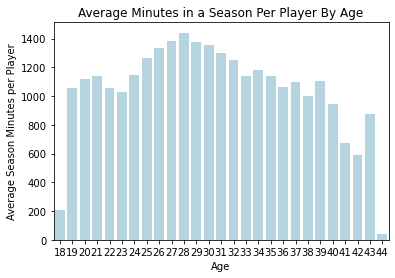

In [51]:
# graph the data
fig = sns.barplot(data=avg_by_age, 
            x="Age_", 
            y="minutes_played_mean", 
            color='lightblue')

fig.set(xlabel='Age', ylabel='Average Season Minutes per Player', title='Average Minutes in a Season Per Player By Age')

plt.show()